## Часть 1. Свойства ДВПФ

In [1]:
import numpy as np
import sympy as sym
from  matplotlib import pyplot as plt

from sympy.functions.elementary.exponential import exp
from sympy import I, Abs

In [2]:
def dttft_abs(signal, start=-0.5, stop=0.5, number_of_freqs=1024):
    freqs = np.linspace(start, stop, number_of_freqs)
    values = np.abs(np.fft.fftshift(np.fft.fft(signal, number_of_freqs)))
    return freqs, values

\begin{equation} 
X(\nu)=\sum_{k=-\infty}^{\infty}x(k)e^{-j2\pi\nu k},
\end{equation}

\begin{equation}
x(k)=\int_{-1/2}^{1/2}X(\nu)e^{j2\pi\nu k}d\nu.
\end{equation}

Вычисление модуля ДВПФ для последовательности отсчетов $x(k)$ конечной длины в $M$ точках при $\nu \in [-0.5; 0.5]$.

In [5]:
def plot_signal(values, counts=None):
    if counts is None:
        counts = np.arange(len(values))
        
    plt.figure(figsize=[6, 2], dpi=100)
    plt.stem(counts, values, use_line_collection=True)
    
    plt.title(f'Signal N = {len(counts)}')
    plt.ylabel('$x(k)$')
    plt.xlabel('$k$')
    plt.grid()
    
def plot_spectrum(values, freqs):
    plt.figure(figsize=[6, 2], dpi=100)
    plt.plot(freqs, values, 'g')
    
    plt.axis(xmin=-0.5, xmax=0.5, ymin=0)
    plt.xticks(np.arange(-0.5, 0.6, 0.1))
    
    plt.title(u'DTFT of $x(k)$')
    plt.ylabel(u'$|X(\\nu)|$')
    plt.xlabel(u'$\\nu$')
    plt.tight_layout()
    plt.grid()

In [38]:
num_of_freqs=1024
num_of_counts=7
L=3
freq_shift=0.1

### Задание

#### №1
Получите с помощью моделирования в Octave/Python ДВПФ спектр единичного импульса $\mathbf1(k)$ для нормированных частот $\nu \in [-0,5; \;0,5]$. Сравните результат со свойством
\begin{equation} \label{oneEq}
\mathbf1(k)\leftrightarrow1
\end{equation}

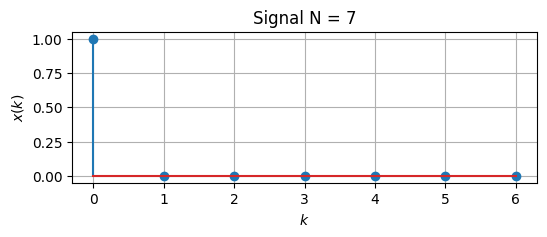

In [7]:
signal = np.zeros(num_of_counts)
signal[0] = 1

plot_signal(signal)

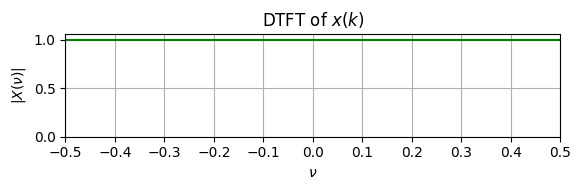

In [8]:
freqs, values = dttft_abs(signal)
plot_spectrum(values, freqs)

Полученный результат совпадает с теоретическим.

#### №2
Используя моделирование в Octave/Python, получите ДВПФ спектр двух последовательных единичных импульсов $x_2(k)=\mathbf1(k)+\mathbf1(k-1)$ для $\nu \in [-0,5; \;0,5]$.

Применяя теорему запаздывания и свойство линейности, получите аналитическое выражение для ДВПФ спектра $X_2(\nu)$ последовательности $x_2(k)$. Сравните результаты.

Зная аналитическую запись $X_2(\nu)$, вычислите значение интеграла $\int_{-1/2}^{1/2}\left|X_2(\nu)\right|^2d\nu$. Сравните результат с тем, который получается путем применения равенства Парсеваля.

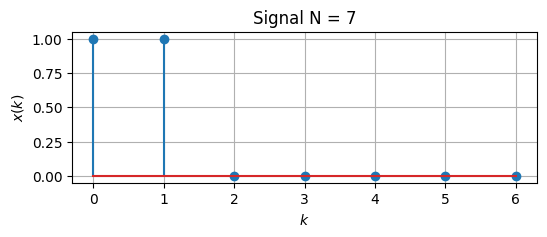

In [10]:
signal=np.zeros(num_of_counts)
signal[0] = 1
signal[1] = 1
plot_signal(signal)

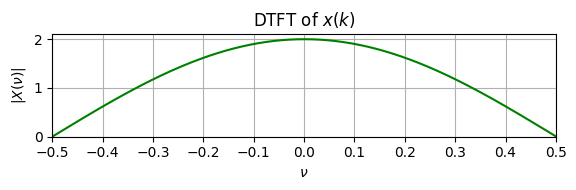

In [11]:
freqs, values = dttft_abs(signal)
plot_spectrum(values, freqs)

Получим аналитическое выражение для сигнала $x_2(k)$:
\begin{equation}\label{eq:pythagoras}
    \left|\sum_{k=-\infty}^{+\infty} x_2(k) \right| = |1 + e^{-2j\pi\nu}| = 2|e^{-j\pi\nu}||\cos(\pi\nu)| = 2|\cos(\pi\nu)|
\end{equation}

Зная аналитическое выражение, найдём значение интеграла для |$X_2(\nu)|^{2}$:
\begin{equation}
       \int_{-1/2}^{1/2} 4|\cos(\pi\nu)|^2 d\nu = 2
\end{equation}

Теперь получим результат для неравенства Парсеваля:
\begin{equation}
        \sum_{k=-\infty}^{+\infty} |x_2(k)|^2 = 1 + 1 = 2
\end{equation}

В обоих случаях значения совпадают.

#### №3
Вычислите и постройте в Octave/Python  ДВПФ спектр  $X_N(\nu)$ N последовательных единичных импульсов $x_N(k)=\sum_{m=0}^{N-1} \mathbf1(k-m)$ для $\nu \in [-0,5; \;0,5]$.

Получите аналитическую запись $X_N(\nu)$ с использованием теоремы запаздывания (воспользоваться формулой геометрической прогрессии для суммы комплексных экспонент). Сравните результат с непосредственным вычислением ДВПФ спектра в Octave/Python.

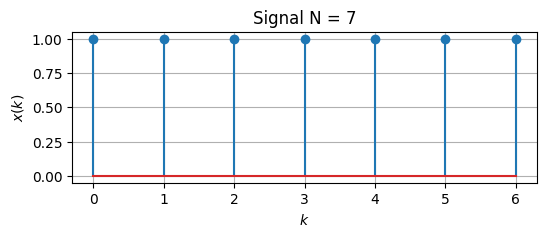

In [12]:
signal = np.ones(num_of_counts)
plot_signal(signal)

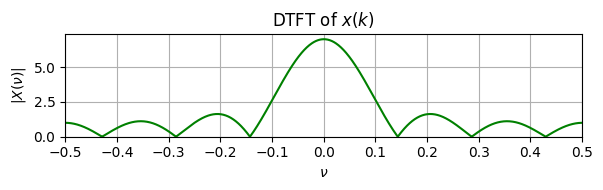

In [13]:
freqs, values = dttft_abs(signal)
plot_spectrum(values, freqs)

Получим аналитическое выражение для спектра $x_N(k)$:
\begin{equation}
    \sum_{k=-\infty}^{+\infty} x_N(k)e^{-2\pi j\nu k} = \sum_{k=0}^{N-1}x(k)e^{-2\pi j\nu k} = e^{-j\left(N - 1\right)\pi \nu} \frac{\sin(N\pi \nu)}{\sin(\pi \nu)}
\end{equation}

\begin{equation}
    |X_N(\nu)| = \left |\frac{\sin(N\pi \nu)}{\sin(\pi \nu)} \right|
\end{equation}
Что совпадает с результатом, полученным выше.

#### №4
Рассмотрите последовательность $y(k)=kx_N(k)$. Найдите, используя Octave/Python, ее ДВПФ спектр  $Y(\nu)$ для $\nu \in [-0,5; \;0,5]$.

Сравните результат с  аналитической записью $Y(\nu)$  (дифференцирование  $X_N(\nu)$ по частоте, свойство
\begin{equation} \label{difEq}
kx(k)\leftrightarrow \frac{j}{2\pi} \frac{dX(\nu)}{d\nu}.
\end{equation}

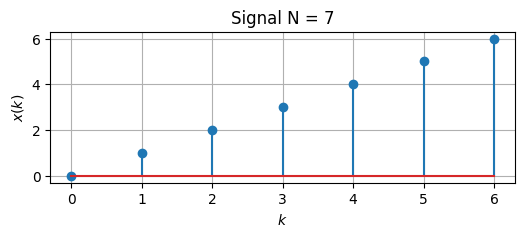

In [15]:
signal = np.arange(num_of_counts)
plot_signal(signal)

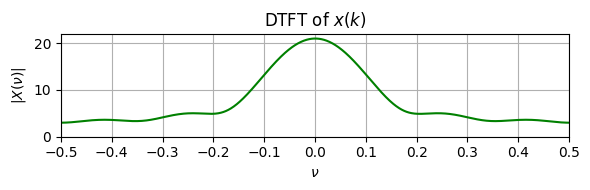

In [16]:
freqs, values = dttft_abs(signal)
plot_spectrum(values, freqs)

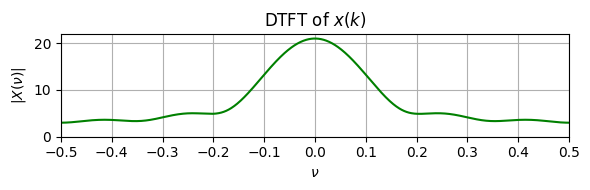

In [19]:
#вычисляем производную спектра
v = sym.Symbol('v')

init_spectrum=sym.sin(num_of_counts* sym.pi* v)/sym.sin(sym.pi* v)
init_spectrum*=exp(sym.pi* I* (num_of_counts - 1)* v)
abs_derivative = sym.Abs(sym.diff(I/(2*sym.pi)*init_spectrum))

freqs = np.linspace(-0.5, 0.5, num_of_freqs)
values = [abs_derivative.evalf(subs={v:x}) for x in freqs]

plot_spectrum(values, freqs)

Видим, что данный график совпадает с полученным ранее.

#### №5
Рассмотрите последовательность $z(k)$, получаемую добавлением между каждой парой отсчетов последовательности  $x_N(k)$ $L-1$ нулей:
$$
\sum_{m=-\infty}^{\infty} x_N(m)\mathbf1(k - mL).
$$
Постройте ее ДВПФ спектр в Octave/Python для $\nu \in [-0,5; \;0,5]$ и сравните результат с $X_N(\nu L)$ (свойство
$
\sum_{m=-\infty}^{\infty} x(m) \mathbf1 (k-mL) \leftrightarrow X(\nu L) $)


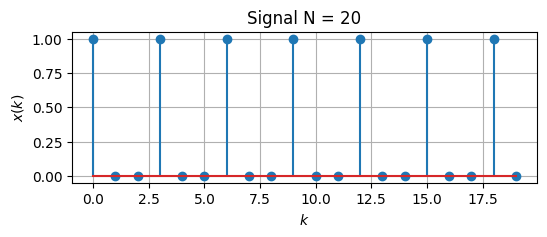

In [39]:
signal = np.zeros(num_of_counts*L -1)
signal[::L] = 1

plot_signal(signal)

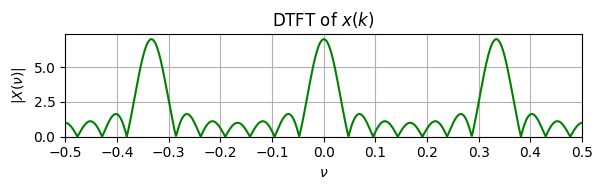

In [40]:
freqs, values = dttft_abs(signal)
plot_spectrum(values, freqs)

Теперь $X(\nu L)$:

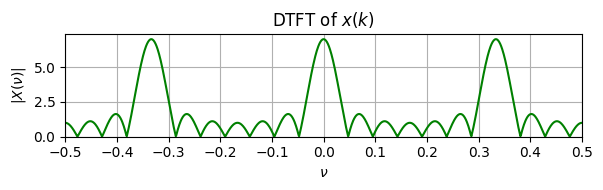

In [41]:
v=sym.Symbol('v')
init_spectrum=sym.Abs(sym.sin(num_of_counts* sym.pi* v)/sym.sin(sym.pi*v))

values = [init_spectrum.evalf(subs={v:x*L}) for x in freqs]
values[0] = values[1]
values[-1] = values[-2]

plot_spectrum(values, freqs)

Как видим, мы получили такой же график.

#### №6

Постройте в Octave/Python для $\nu \in [-0,5; \;0,5]$ ДВПФ спектр $Q(\nu)$ последовательности $q(k)=x_N(k)\exp(j2\pi\nu_0 k)$ для $\nu_0$. Чем отличаются $Q(\nu)$ и $X_N(\nu)$? Как это согласуется с теоремой смещения? 

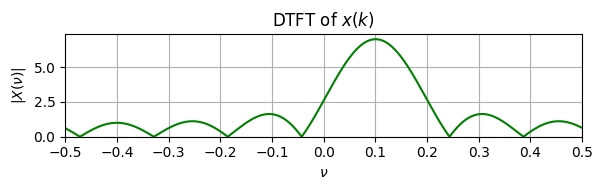

In [24]:
signal = np.exp(2*1j*np.pi*freq_shift*np.arange(num_of_counts))

freqs, values = dttft_abs(signal)
plot_spectrum(values, freqs)

$Q(\nu)$ сдвинут относительно $X_N(\nu)$ на величину $\nu 0=-1/10 $ влево. Данный результат согласуется с теоремой смещения.

### Контрольные вопросы
#### 1.
Пусть $X(\nu)$ -- ДВПФ спектр некоторой последовательности $x(k)$. Как нужно изменить последовательность $x(k)$, чтобы ее ДВПФ спектр был сдвинут влево относительно исходного на $\nu_0=1/10$?

Согласно теореме смещения, необходимо выполнить следующую замену:
\begin{equation}
    x(k)  \rightarrow x(k)e^{-j2\pi \nu_0 k}
\end{equation}

#### 2.
Пусть $X_5(\nu)$ -- ДВПФ спектр  пяти последовательных единичных импульсов $x_5(k)=\sum_{m=0}^{4} \mathbf1(k-m)$, а $Y(\nu)$ -- ДВПФ спектр  последовательности $y(k)=kx_5(k)$. 
Пусть также
$$\Phi(\nu)=\int_{-1/2}^{1/2}X_5(\widetilde\nu)Y(\nu-\widetilde\nu)d\widetilde\nu,$$
$$ \Psi(\nu)=\int_{-1/2}^{1/2}Y(\widetilde\nu)X_5(\nu-\widetilde\nu)d\widetilde\nu. $$
Чему равно $\Phi(\nu)$? Выполняется ли $\Phi(\nu)\equiv\Psi(\nu)?$

$\Phi(\nu)$ - спектр произведения сигналов $x(k)y(k)$, при этом $x(k)y(k) = y(k)$

$\Phi(\nu) = \Psi(\nu)$

#### 3.
Предположим, что имеется финитная последовательность 
$$x(k)=\{1;\;5;\;\underbrace{2}_{k=0};\;4;\;1;\;1;\;3\}.$$
Не вычисляя непосредственно ее ДВПФ $X(\nu)$, опередите значения следующих выражений:

* $X(0)$;
* $X(1/2)$;
* $\int_{-1/2}^{1/2}X(\nu)d\nu$;
* $\int_{-1/2}^{1/2}\left|X(\nu)\right|^2d\nu$;
* $\int_{-1/2}^{1/2}\left|\frac{dX(\nu)}{d\nu}\right|^2d\nu$.

In [25]:
import numpy as np
array = np.array([-4, 5, -5, -3, 4, -1, -6])

In [26]:
np.exp(-1j * np.pi * np.arange(-2, 5))

array([ 1.-2.4492936e-16j, -1.+1.2246468e-16j,  1.+0.0000000e+00j,
       -1.-1.2246468e-16j,  1.+2.4492936e-16j, -1.-3.6739404e-16j,
        1.+4.8985872e-16j])

In [27]:
np.sum(array * array)

128

In [28]:
(array * array).sum()

128

\begin{equation}
X(0) = \sum_{k=-\infty}^{+\infty} x(k) = 1 + 5 + 2 + 4 + 1 + 1 + 3 = 17
\end{equation}

\begin{equation}
X(1/2) =  \sum_{k=-2}^{4} x(k)e^{-\pi j k} = -3
\end{equation}

\begin{equation}
\int_{-1/2}^{1/2}X(\nu)d\nu = F^{-1}\{X(\nu)\}(k=0) = x(0) = 2
\end{equation}

\begin{equation}
\int_{-1/2}^{1/2}\left|X(\nu)\right|^2d\nu = \sum_{k=-2}^{4} |x(k)|^{2} = 57
\end{equation}

\begin{equation}\int_{-1/2}^{1/2}\left|\frac{dX(\nu)}{d\nu}\right|^2d\nu = (2\pi)^2 \int_{-1/2}^{1/2}\left|\frac{j}{2\pi}\frac{dX(\nu)}{d\nu}\right|^2d\nu =(2\pi)^2 \sum_{k=-2}^{4} |kx(k)|^{2} = 808 \pi^2
\end{equation}

#### 4.
Докажите равенство Парсеваля для ДВПФ. 

\begin{equation}
\begin{aligned}
\int_{-1/2}^{1/2}\left|X(\nu)\right|^2d\nu = \int_{-1/2}^{1/2}X^{*} (\nu)X(\nu)d\nu = 
 \int_{-1/2}^{1/2} \left(\sum_{k=-\infty}^{+\infty} x(k)e^{-2\pi j\nu k}\right)^{*} X(\nu)d\nu  
\end{aligned}
\end{equation}

\begin{equation}
\begin{aligned}
\int_{-1/2}^{1/2} \left(\sum_{k=-\infty}^{+\infty} x(k)e^{-2\pi j\nu k}\right)^{*} X(\nu)d\nu = 
\int_{-1/2}^{1/2} \left(\sum_{k=-\infty}^{+\infty} x^{*}(k)e^{2\pi j\nu k}\right) X(\nu)d\nu = 
\sum_{k=-\infty}^{+\infty} x^{*}(k) \left(\int_{-1/2}^{1/2} X(\nu) e^{2\pi j\nu k} \right)d\nu = \sum_{k=-\infty}^{+\infty} x^{*}(k)  x(k) = \sum_{k=-\infty}^{+\infty} \left|x(k) \right|^2
\end{aligned}
\end{equation}

#### 5.
Докажите для ДВПФ свойство:

если
$
x(k)\leftrightarrow X(\nu), то 
$
$
kx(k)\leftrightarrow \dfrac{j}{2\pi} \dfrac{dX(\nu)}{d\nu}.
$

Получите аналогичное свойство для спектра сигнала (последовательности) $k^M x(k)$, где M - натуральное число.  

\begin{equation}
\begin{aligned}
\frac{j}{2\pi} \frac{dX(\nu)}{d\nu} =  \frac{j}{2\pi} \frac{d}{d\nu} \sum_{k=-\infty}^{+\infty} x(k)e^{-2\pi j\nu k} =
\frac{j}{2\pi} \sum_{k=-\infty}^{+\infty} -2 \pi jkx(k)e^{-2\pi j\nu k} = \sum_{k=-\infty}^{+\infty} kx(k)e^{-2\pi j\nu k}
\end{aligned}
\end{equation}

Применяя формулу $M$ раз, получим:
\begin{equation}
k^M x(k) \leftrightarrow \left(\dfrac{j}{2\pi} \right)^{M} \dfrac{d^{M}X(\nu)}{(d\nu)^{M}}
\end{equation}

#### 6. 
Предположим, что аналоговый сигнал $x(t)=\cos(2\pi t f_0)$, $-\infty<t<\infty$,  $f_0=250$ Гц был дискретизован с частотой дискретизации $f_d=1$ кГц. Будет ли наблюдаться эффект наложения (aliasing)?

Определить и построить график ДВПФ для отсчетов сигнала $x(t)$ в переменных $f$ и $\nu$:

$$X(f)=\Delta t \sum_{k=-\infty}^{\infty} x(k\Delta t) \exp(-j2\pi f k \Delta t),$$

$$X(\nu)=\Delta t \sum_{k=-\infty}^{\infty} x(k\Delta t) \exp(-j2\pi \nu k ).$$

Ширина спектра для функции $\cos(2\pi tf_0)$ составляет $2f_0 < f_d$. Эффект наложения наблюдаться не будет.

Для функции $\cos(2\pi tf_0) \leftrightarrow \frac{1}{2} \left(\delta(f-f_0)  + \delta(f+f_0)\right)$. Спектр дискретизованного сигнала представляет собой
периодическое повторение исходного спектра с периодом, равным частоте
дискретизации $f_d$.

In [29]:
count_freq = 500
signal_f = 250

In [30]:
freqs = np.linspace(-count_freq, count_freq, 2*count_freq)
values = np.zeros(len(freqs))
values[signal_f] = 1
values[-signal_f] = 1

In [31]:
f = [freqs - 2*count_freq *x for x in range(-2, 3)]
f = np.concatenate(f)
tiled_values = np.tile(values, 5)

In [32]:
v = np.array(f)/(2*count_freq)

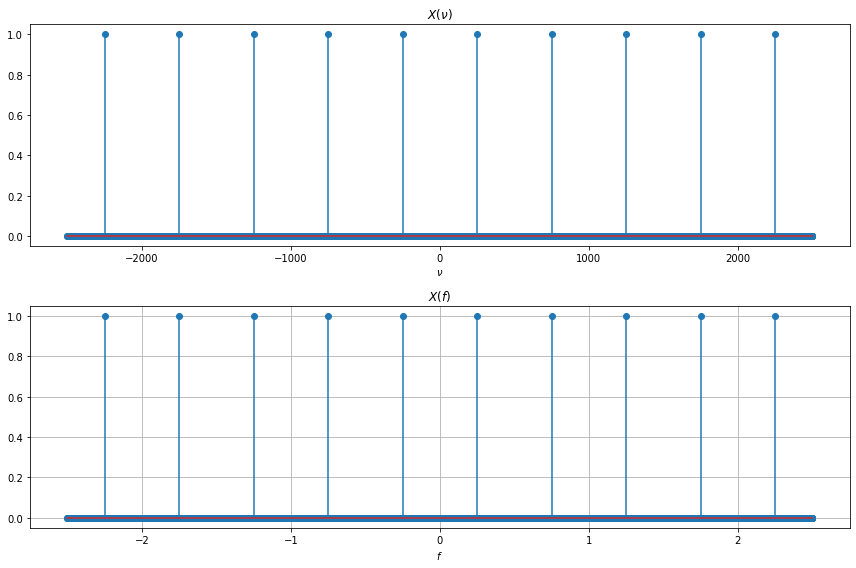

In [33]:
fig, (f_ax, v_ax) = plt.subplots(2, 1 ,figsize=(12, 8))

f_ax.stem(f, tiled_values, use_line_collection=True)
f_ax.set_title(u'$X(\\nu)$')
f_ax.set_xlabel(u'$\\nu$')

v_ax.stem(v, tiled_values, use_line_collection=True)
v_ax.set_title(u'$X(f)$')
v_ax.set_xlabel(u'$f$')

plt.tight_layout()
plt.grid()

#### 7.
Построить графики ДВПФ сигналов (последовательностей) $x_1(k)=\cos(2\pi k \nu_0)$ и $x_2(k)=\sin(2\pi k \nu_0)$, $\nu_0=0.2$, $-\infty<k<\infty$

Определить ДВПФ для последовательностей $y_1(k)$ и $y_2(k)$ взвешанных прямоугольной оконной функцией $w(k)=\sum_{m=0}^{N-1} \mathbf1(k-m)$, т.е. $y_1(k)=x_1(k)w(k)$ и $y_2(k)=x_2(k)w(k)$ (это можно сделать, зная ДВПФ окна и используя теорему смещения).

In [35]:
v = np.arange(21)/10 - 1

In [36]:
x1 = np.zeros(len(v))
x1[12] = 1
x1[9] = 1

x2= np.zeros(len(v))
x2[12] = -1
x2[9] = 1

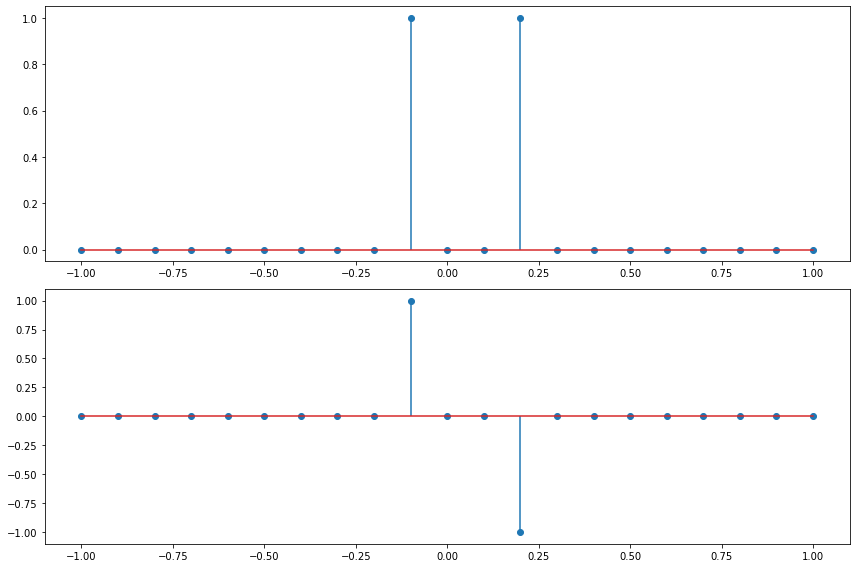

In [37]:
fig, (cos_ax, sin_ax) = plt.subplots(2, 1 ,figsize=(12, 8))

cos_ax.stem(v, x1, use_line_collection=True)
sin_ax.stem(v, x2, use_line_collection=True)
plt.tight_layout()

Рассмотрим  спектр произведения сигналов:
\begin{equation}
y_1(k) = x_1(k) w(k) = \left(\frac{1}{2} \exp(j 2\pi k \nu_0) + \frac{1}{2} \exp(-j 2\pi k \nu_0) \right) w(k)
\end{equation}

Далее воспользуемся теоремой смещения и линейностью ДВПФ :
\begin{equation}
Y_1(\nu) = \frac{1}{2} \left(W(\nu + \nu_0) + W(\nu - \nu_0) \right)
\end{equation}


\begin{equation}
Y_2(\nu) = \frac{1}{2j} \left(W(\nu - \nu_0) -W(\nu + \nu_0)  \right)
\end{equation}

\begin{equation}
W(\nu) = e^{-j\left(N - 1\right)\pi \nu} \frac{\sin(N\pi \nu)}{\sin(\pi \nu)}
\end{equation}